# Required Installations

In [0]:
!pip install -U torch torchvision
!pip install git+http://github.com/facebookresearch/fvcore.git
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo


Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.4.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.5.0)
  Cloning http://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-e5qbnql_
  Running command git clone -q http://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-e5qbnql_
     |████████████████████████████████| 276kB 27.1MB/s 
  Created wheel for fvcore: filename=fvcore-0.1-cp36-none-any.whl size=42662 sha256=322f91a5cc6dff36f3d0fdf8f8888b050c4da766250be0892a7e87e09e72796e
  Stored in directory: /tmp/pip-ephem-wheel-cache-r62hz41s/wheels/be/b7/53/f08ae10ca47eef890098211623b7a7d5c55df181da6f27e824
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=ed9f37938ea527ea43a5f61c7c8b1cf3f1a379d047a1113db9a9cdca72724e10
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built fvcore p

#Drive Mount


In [0]:
from google.colab import drive
import os

DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)

IMG_FOLDER=os.path.join('/content/gdrive/My Drive/Code gen for safety contract', 'Images')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Adding folder from a drive into colab path

In [0]:
import sys
sys.path.insert(0, '/content/gdrive/My Drive/Code gen for safety contract/Images')

# Loading detector

In [0]:
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2


# Create config
cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"


ModuleNotFoundError: ignored

# Running detection on our imageset

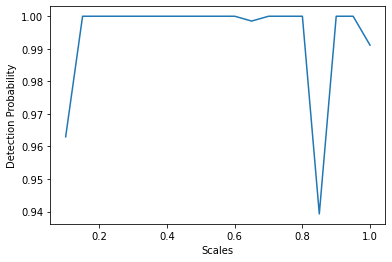

[0.99111111 1.         1.         0.93925926 1.         1.
 1.         0.99851852 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.96296296]


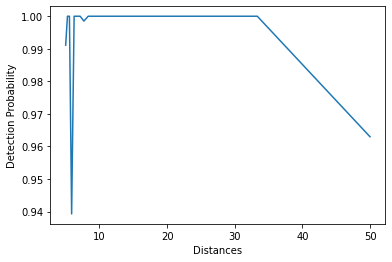

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# get image
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
#im = cv2.imread("/content/gdrive/My Drive/Code gen for safety contract/Images/Scale-1.0/car0_road34.png")
#outputs = predictor(im)

def detections():
  # Create predictor
  predictor = DefaultPredictor(cfg)
  total_detections = []
  starting_scale = 1
  for i in range(0, 19):
    scale = starting_scale - 0.05*i
    # counter to count the number of detections for the current scale
    true_positives = 0
    for car_id in range(0, 15):
        car_type = car_id
        for road_id in range(4, 49):
          road_type = road_id
          img_name='car'+str(car_id)+'_'+'road'+str(road_id)+'.png'
          im = cv2.imread("/content/gdrive/My Drive/Code gen for safety contract/Images/Scale-"+str(scale)+"/"+str(img_name))
          # Make prediction
          outputs = predictor(im)
          detections = outputs["instances"].pred_classes.to("cpu")
          confidences = outputs["instances"].scores.to("cpu")
          detection_flag = False
          for d in range(detections.shape[0]):
          # If one of the detections is car and its detection confidence is > 0.5, then the car got detected
            if(detections[d].item() == 2 and confidences[d] > .5 and detection_flag == False):
              true_positives += 1
              detection_flag = True
    total_detections.append(true_positives)
    print(total_detections)
    np.save(os.path.join(IMG_FOLDER,'detections.npy'),np.array(total_detections))


def plotPredictionsCurveWithScale():

  # y axis values
  detections = np.load(os.path.join(IMG_FOLDER,'detections.npy'))
  normalize_detections = detections/675.
  # corresponding x axis values 
  scales = [1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
    
  # plotting the points  
  plt.plot(scales, normalize_detections) 
    
  # naming the x axis 
  plt.xlabel('Scales') 
  # naming the y axis 
  plt.ylabel('Detection Probability') 
    
  plt.savefig(os.path.join(IMG_FOLDER, 'detections_sclae.png'))
  # function to show the plot 
  plt.show()  

plotPredictionsCurveWithScale() 

def plotPredictionsCurveWithDis():

  # y axis values
  detections = np.load(os.path.join(IMG_FOLDER,'detections.npy'))
  normalize_detections = detections/675.
  print(normalize_detections)
  # corresponding x axis values 
  scales = [1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
  scales = np.asarray(scales)
  distances = 5./scales

  #print(distances)
    
  # plotting the points  
  plt.plot(distances, normalize_detections) 
    
  # naming the x axis 
  plt.xlabel('Distances') 
  # naming the y axis 
  plt.ylabel('Detection Probability') 
    
  plt.savefig(os.path.join(IMG_FOLDER, 'detections_distance.png'))
  # function to show the plot 
  plt.show()  

plotPredictionsCurveWithDis() 

# print(outputs["instances"].pred_classes[0].to("cpu"))
# x = outputs["instances"].pred_classes.to("cpu")
# y = outputs["instances"].scores.to("cpu")

# for i in range(x.shape[0]):
#  if(x[i].item() == 2 and y[i] > .98):
#   print("Car detected")

# Visualization of detection

In [0]:
from google.colab.patches import cv2_imshow
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])